#Introducción
Platzi -Escuela de Ciencia de Datos 

*Análisis de Series de Tiempo (TSA)*

In [ ]:
# load time series dataset
import pandas as pd 
import numpy as np 
import seaborn as sns

In [ ]:
url='https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/df_power.csv'

In [ ]:
df_power_system= pd.read_csv(url,error_bad_lines=False)

In [ ]:
df_power_system.columns

Index(['Unnamed: 0', 'Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [ ]:
df_power_system.shape

(4383, 6)

In [ ]:
df_power_system.tail(10)

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
4373,4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [ ]:
#convertir  object para  datetime 
df_power_system['Date'] = pd.to_datetime(df_power_system['Date'])

In [ ]:
df_power_system = df_power_system.set_index('Date')


In [ ]:
# Add columns with year, month, and weekday name
df_power_system['Year'] = df_power_system.index.year
df_power_system['Month'] = df_power_system.index.month


In [ ]:
df_power_system['Weekday Name'] = df_power_system.index.day_name()

In [ ]:
df_power_system.head()

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,,
2006-01-01,0,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,2,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,3,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,4,1477.131,NaN,NaN,NaN,2006,1,Thursday


# VIsuzalización de los datos 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


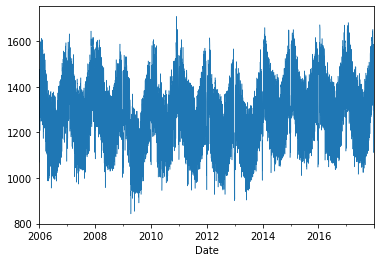

In [ ]:
df_power_system['Consumption'].plot(linewidth=0.5)

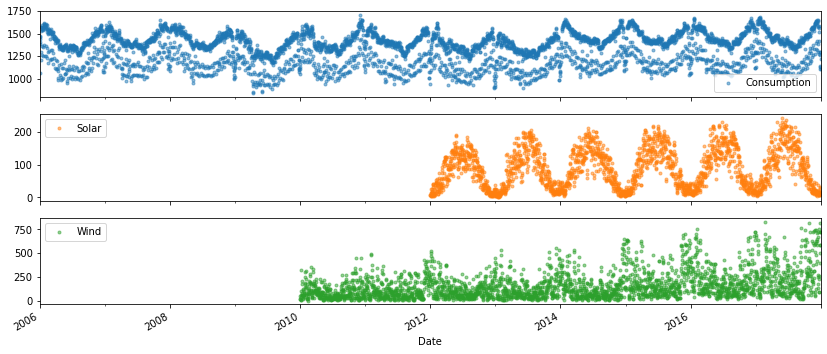

In [ ]:
cols_to_plot = ['Consumption', 'Solar', 'Wind']
axes = df_power_system[cols_to_plot].plot(marker='.', alpha=0.5,
linestyle='None',figsize=(14, 6), subplots=True)


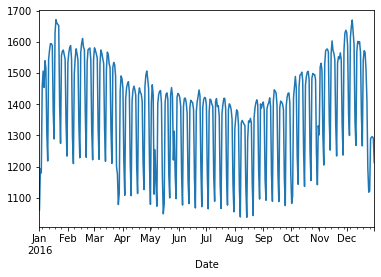

In [ ]:
ax = df_power_system.loc['2016', 'Consumption'].plot()
#ax.set_ylabel('Daily Consumption (GWh)');

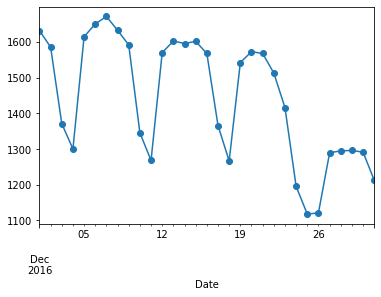

In [ ]:
ax = df_power_system.loc['2016-12', 'Consumption'].plot(marker='o', linestyle='-')
#ax.set_ylabel('Consumo Diario (GWh)');

Agrupando los datos 

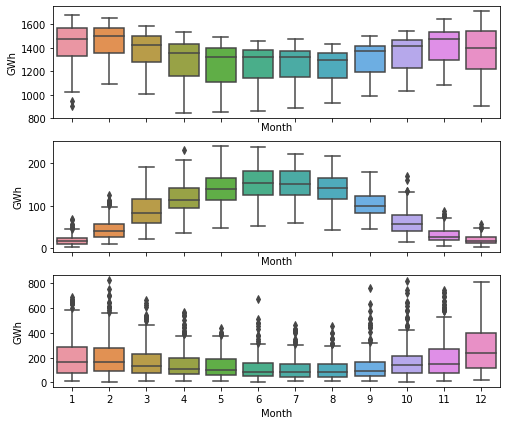

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=df_power_system, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    

In [ ]:
power_weak_mean = df_power_system[columns].resample('W').mean()


In [ ]:
power_weak_mean